# Predicting the ideal race strategy for Lando Norris in Miami GP 2024

In [90]:
!pip install fastf1 matplotlib numpy pandas

In [91]:
import fastf1
from fastf1 import plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Miami Historical data

In [92]:
years = [2019, 2020, 2021, 2022, 2023]

miami_history = pd.DataFrame()
miami_weather = pd.DataFrame()

for year in years:
    session = fastf1.get_session(year, "Miami Grand Prix", 'R')
    session .load()

    driver_laps = race.laps.pick_driver("NOR")
    
    # Extract weather data
    weather_data = session.weather_data
    weather_data['year'] = year
    
    miami_history = pd.concat([miami_history, driver_laps])
    miami_weather = pd.concat([miami_weather, weather_data])

events      WARNING 	Correcting user input 'Miami Grand Prix' to 'Italian Grand Prix'
core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '77', '44', '3', '27', '23', '11', '33', '99', '4', '10', '18', '5', '63', '7', '8', '

In [93]:
miami_history

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
657,0 days 01:04:57.439000,NOR,4,0 days 00:01:55.413000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:44.319000,...,True,McLaren,0 days 01:03:01.758000,2023-04-30 11:04:03.228,12,8.0,False,,False,False
658,0 days 01:06:46.178000,NOR,4,0 days 00:01:48.739000,2.0,1.0,NaT,NaT,0 days 00:00:39.036000,0 days 00:00:44.081000,...,True,McLaren,0 days 01:04:57.439000,2023-04-30 11:05:58.909,1,8.0,False,,False,True
659,0 days 01:08:34.272000,NOR,4,0 days 00:01:48.094000,3.0,1.0,NaT,NaT,0 days 00:00:38.463000,0 days 00:00:43.906000,...,True,McLaren,0 days 01:06:46.178000,2023-04-30 11:07:47.648,1,8.0,False,,False,True
660,0 days 01:10:22.368000,NOR,4,0 days 00:01:48.096000,4.0,1.0,NaT,NaT,0 days 00:00:38.536000,0 days 00:00:43.961000,...,True,McLaren,0 days 01:08:34.272000,2023-04-30 11:09:35.742,1,8.0,False,,False,True
661,0 days 01:12:10.448000,NOR,4,0 days 00:01:48.080000,5.0,1.0,NaT,NaT,0 days 00:00:38.421000,0 days 00:00:43.998000,...,True,McLaren,0 days 01:10:22.368000,2023-04-30 11:11:23.838,1,8.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,0 days 02:30:00.452000,NOR,4,0 days 00:01:46.188000,47.0,2.0,NaT,NaT,0 days 00:00:37.544000,0 days 00:00:43.241000,...,True,McLaren,0 days 02:28:14.264000,2023-04-30 12:29:15.734,1,10.0,False,,False,True
704,0 days 02:31:46.649000,NOR,4,0 days 00:01:46.197000,48.0,2.0,NaT,NaT,0 days 00:00:37.850000,0 days 00:00:42.907000,...,True,McLaren,0 days 02:30:00.452000,2023-04-30 12:31:01.922,12,10.0,False,,False,True
705,0 days 02:33:32.387000,NOR,4,0 days 00:01:45.738000,49.0,2.0,NaT,NaT,0 days 00:00:37.591000,0 days 00:00:42.771000,...,True,McLaren,0 days 02:31:46.649000,2023-04-30 12:32:48.119,1,10.0,False,,False,True
706,0 days 02:35:18.443000,NOR,4,0 days 00:01:46.056000,50.0,2.0,NaT,NaT,0 days 00:00:37.608000,0 days 00:00:43.108000,...,True,McLaren,0 days 02:33:32.387000,2023-04-30 12:34:33.857,1,9.0,False,,False,True


# Lando 2024 Qualifying data

In [115]:
lando_2024_quali = pd.DataFrame()

for i in range(1,7):
    session = fastf1.get_session(2024, i, 'Q')
    session .load()
    print(session.event['EventName'])
    
    driver_laps = race.laps.pick_driver("NOR")
    driver_laps['Race'] = session.event['EventName']

    lando_2024_quali = pd.concat([driver_laps, lando_2024_quali])

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '63', '55', '11', '14', '4', '81', '44', '27', '22', '18', '23', '3', '20', '77', '24', '2', '31', '10']
/usr/local/lib/python3.10/dist-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and wil

Bahrain Grand Prix


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '14', '81', '4', '63', '44', '22', '18', '38', '23', '20', '3', '27', '77', '31', '10', '2', '24']
/usr/local/lib/python3.10/dist-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
<ipython-input-115-7f9af69adbe0>:9: SettingWithCopyWarning: 
A va

Saudi Arabian Grand Prix


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['1', '55', '11', '4', '16', '81', '63', '22', '18', '14', '44', '23', '77', '20', '31', '27', '10', '3', '24']
/usr/local/lib/python3.10/dist-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
<ipython-input-115-7f9af69adbe0>:9: SettingWithCopyWarning: 
A value i

Australian Grand Prix


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '4', '55', '14', '81', '44', '16', '63', '22', '3', '27', '77', '23', '31', '18', '10', '20', '2', '24']
/usr/local/lib/python3.10/dist-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
<ipython-input-115-7f9af69adbe0>:9: SettingWithCopyWarning: 
A va

Japanese Grand Prix


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '4', '81', '16', '55', '63', '27', '77', '18', '3', '31', '23', '10', '24', '20', '44', '22', '2']
/usr/local/lib/python3.10/dist-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
<ipython-input-115-7f9af69adbe0>:9: SettingWithCopyWarning: 
A va

Chinese Grand Prix


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '55', '11', '4', '81', '63', '44', '27', '22', '18', '10', '31', '23', '14', '77', '2', '3', '20', '24']


Miami Grand Prix


/usr/local/lib/python3.10/dist-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
<ipython-input-115-7f9af69adbe0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_laps['Race'] = session.event['EventName']


In [116]:
lando_2024_quali

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,Race
657,0 days 01:04:57.439000,NOR,4,0 days 00:01:55.413000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:44.319000,...,McLaren,0 days 01:03:01.758000,2023-04-30 11:04:03.228,12,8.0,False,,False,False,Miami Grand Prix
658,0 days 01:06:46.178000,NOR,4,0 days 00:01:48.739000,2.0,1.0,NaT,NaT,0 days 00:00:39.036000,0 days 00:00:44.081000,...,McLaren,0 days 01:04:57.439000,2023-04-30 11:05:58.909,1,8.0,False,,False,True,Miami Grand Prix
659,0 days 01:08:34.272000,NOR,4,0 days 00:01:48.094000,3.0,1.0,NaT,NaT,0 days 00:00:38.463000,0 days 00:00:43.906000,...,McLaren,0 days 01:06:46.178000,2023-04-30 11:07:47.648,1,8.0,False,,False,True,Miami Grand Prix
660,0 days 01:10:22.368000,NOR,4,0 days 00:01:48.096000,4.0,1.0,NaT,NaT,0 days 00:00:38.536000,0 days 00:00:43.961000,...,McLaren,0 days 01:08:34.272000,2023-04-30 11:09:35.742,1,8.0,False,,False,True,Miami Grand Prix
661,0 days 01:12:10.448000,NOR,4,0 days 00:01:48.080000,5.0,1.0,NaT,NaT,0 days 00:00:38.421000,0 days 00:00:43.998000,...,McLaren,0 days 01:10:22.368000,2023-04-30 11:11:23.838,1,8.0,False,,False,True,Miami Grand Prix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,0 days 02:30:00.452000,NOR,4,0 days 00:01:46.188000,47.0,2.0,NaT,NaT,0 days 00:00:37.544000,0 days 00:00:43.241000,...,McLaren,0 days 02:28:14.264000,2023-04-30 12:29:15.734,1,10.0,False,,False,True,Bahrain Grand Prix
704,0 days 02:31:46.649000,NOR,4,0 days 00:01:46.197000,48.0,2.0,NaT,NaT,0 days 00:00:37.850000,0 days 00:00:42.907000,...,McLaren,0 days 02:30:00.452000,2023-04-30 12:31:01.922,12,10.0,False,,False,True,Bahrain Grand Prix
705,0 days 02:33:32.387000,NOR,4,0 days 00:01:45.738000,49.0,2.0,NaT,NaT,0 days 00:00:37.591000,0 days 00:00:42.771000,...,McLaren,0 days 02:31:46.649000,2023-04-30 12:32:48.119,1,10.0,False,,False,True,Bahrain Grand Prix
706,0 days 02:35:18.443000,NOR,4,0 days 00:01:46.056000,50.0,2.0,NaT,NaT,0 days 00:00:37.608000,0 days 00:00:43.108000,...,McLaren,0 days 02:33:32.387000,2023-04-30 12:34:33.857,1,9.0,False,,False,True,Bahrain Grand Prix


# Track data

In [63]:
session = fastf1.get_session(2023, 'Miami Grand Prix', 'R')
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

circuit_info = session.get_circuit_info()

core           INFO 	Loading data for Miami Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '63', '55', '44', '16', '10', '31', '20', '22', '18', '77', '23', '27', '24', '4', '21', '81', '2']
core        WARNING 	Failed to preserve data type for column 'X

In [64]:
def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

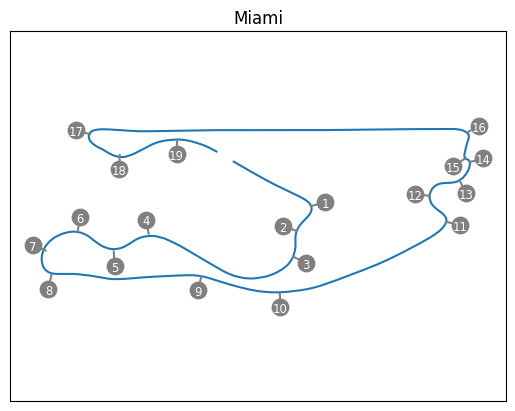

In [65]:
# Get an array of shape [n, 2] where n is the number of points and the second
# axis is x and y.
track = pos.loc[:, ('X', 'Y')].to_numpy()

# Convert the rotation angle from degrees to radian.
track_angle = circuit_info.rotation / 180 * np.pi

# Rotate and plot the track map.
rotated_track = rotate(track, angle=track_angle)
plt.plot(rotated_track[:, 0], rotated_track[:, 1])
offset_vector = [500, 0]  # offset length is chosen arbitrarily to 'look good'

# Iterate over all corners.
for _, corner in circuit_info.corners.iterrows():
    # Create a string from corner number and letter
    txt = f"{corner['Number']}{corner['Letter']}"

    # Convert the angle from degrees to radian.
    offset_angle = corner['Angle'] / 180 * np.pi

    # Rotate the offset vector so that it points sideways from the track.
    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    # Add the offset to the position of the corner
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    # Rotate the text position equivalently to the rest of the track map
    text_x, text_y = rotate([text_x, text_y], angle=track_angle)

    # Rotate the center of the corner equivalently to the rest of the track map
    track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)

    # Draw a circle next to the track.
    plt.scatter(text_x, text_y, color='grey', s=140)

    # Draw a line from the track to this circle.
    plt.plot([track_x, text_x], [track_y, text_y], color='grey')

    # Finally, print the corner number inside the circle.
    plt.text(text_x, text_y, txt,
             va='center_baseline', ha='center', size='small', color='white')

plt.title(session.event['Location'])
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()

core           INFO 	Loading data for Miami Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '63', '55', '44', '16', '10', '31', '20', '22', '18', '77', '23', '27', '24', '4', '21', '81', '2']
core        WARNING 	Failed to preserve data type for column 'X

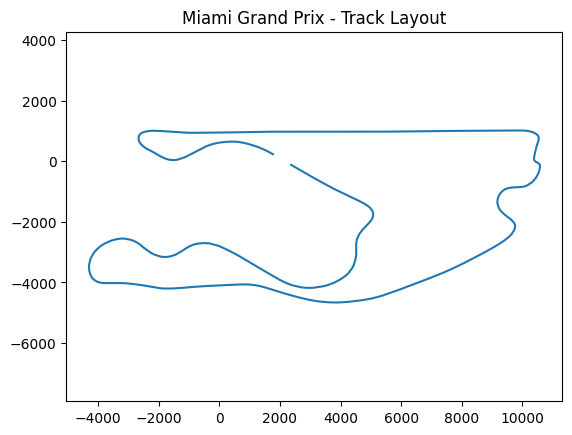

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


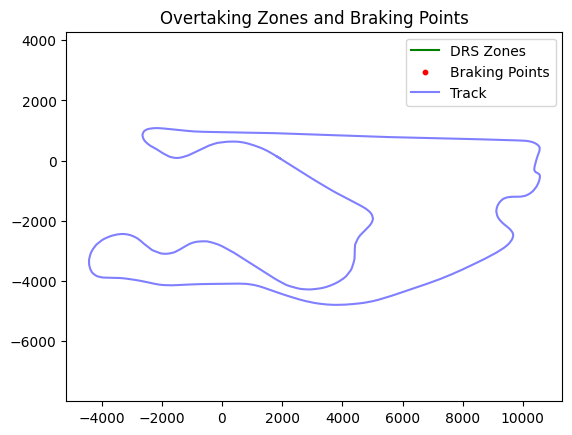

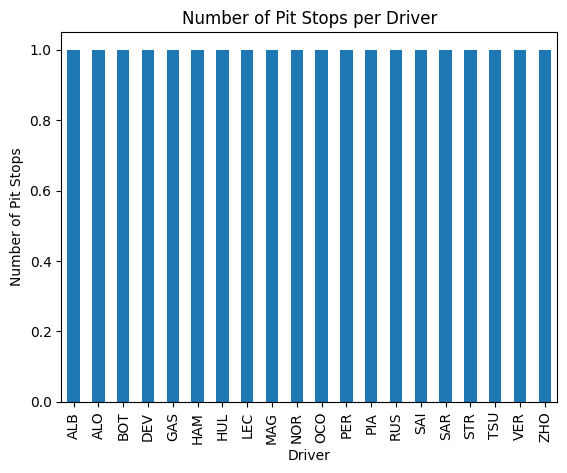

In [66]:
# Load a specific Miami GP session (e.g., 2023 Race)
session = ff1.get_session(2023, "Miami", "R")
session.load()

# 1. Analyze the Yas Marina Circuit Layout
def analyze_track_layout(session):
    circuit_info = session.get_circuit_info()
    pos = lap.get_pos_data()
    
    # Extract track position data
    track = pos.loc[:, ('X', 'Y')].to_numpy()
    track_angle = circuit_info.rotation / 180 * np.pi
    
    # Rotate and plot the track map
    rotated_track = rotate(track, angle=track_angle)
    plt.plot(rotated_track[:, 0], rotated_track[:, 1])
    plt.title(f"{session.event['EventName']} - Track Layout")
    plt.axis('equal')
    plt.show()

# Utility function to rotate the track
def rotate(points, angle):
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    return np.dot(points, rotation_matrix.T)

analyze_track_layout(session)

# 2. Overtaking Zones and Braking Points
def find_overtaking_zones(session):
    # Filter telemetry data for straight-line speeds and DRS activation
    laps = session.laps.pick_fastest()  # Use fastest lap telemetry for analysis
    telemetry = laps.get_telemetry()
    
    # Identify high-speed DRS zones
    drs_telemetry = telemetry[telemetry['DRS'] == 1]
    plt.plot(drs_telemetry['X'], drs_telemetry['Y'], label='DRS Zones', color='green')
    
    # Highlight heavy braking zones (large deceleration)
    braking_zones = telemetry[telemetry['Brake'] > 90]  # Threshold for braking effort
    plt.scatter(braking_zones['X'], braking_zones['Y'], label='Braking Points', color='red', s=10)
    
    # Plot track map for context
    plt.plot(telemetry['X'], telemetry['Y'], label='Track', color='blue', alpha=0.5)
    plt.legend()
    plt.title("Overtaking Zones and Braking Points")
    plt.axis('equal')
    plt.show()

find_overtaking_zones(session)

# 4. Pit Stop Strategies
def analyze_pit_stop_strategies(session):
    pit_stops = session.laps[session.laps['PitInTime'].notna()]
    pit_counts = pit_stops.groupby('Driver')['LapNumber'].count()
    
    pit_counts.plot(kind='bar', title="Number of Pit Stops per Driver")
    plt.xlabel("Driver")
    plt.ylabel("Number of Pit Stops")
    plt.show()

analyze_pit_stop_strategies(session)

# Weather data

In [67]:
miami_weather

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,year
0,0 days 00:00:33.113000,19.7,58.2,989.6,False,32.8,355,0.0,2019
1,0 days 00:01:33.313000,20.0,58.2,989.6,False,32.8,268,0.7,2019
2,0 days 00:02:33.435000,20.2,57.1,989.6,False,32.9,6,0.7,2019
3,0 days 00:03:33.151000,20.5,56.7,989.6,False,33.0,296,0.9,2019
4,0 days 00:04:33.164000,20.9,55.1,989.6,False,33.9,319,0.7,2019
...,...,...,...,...,...,...,...,...,...
150,0 days 02:30:24.116000,27.1,60.0,1017.9,False,33.1,136,3.0,2023
151,0 days 02:31:24.100000,27.1,59.0,1017.7,False,33.1,127,3.4,2023
152,0 days 02:32:24.115000,27.1,58.0,1017.9,False,33.6,143,3.0,2023
153,0 days 02:33:24.114000,27.2,58.0,1017.7,False,33.9,354,1.7,2023


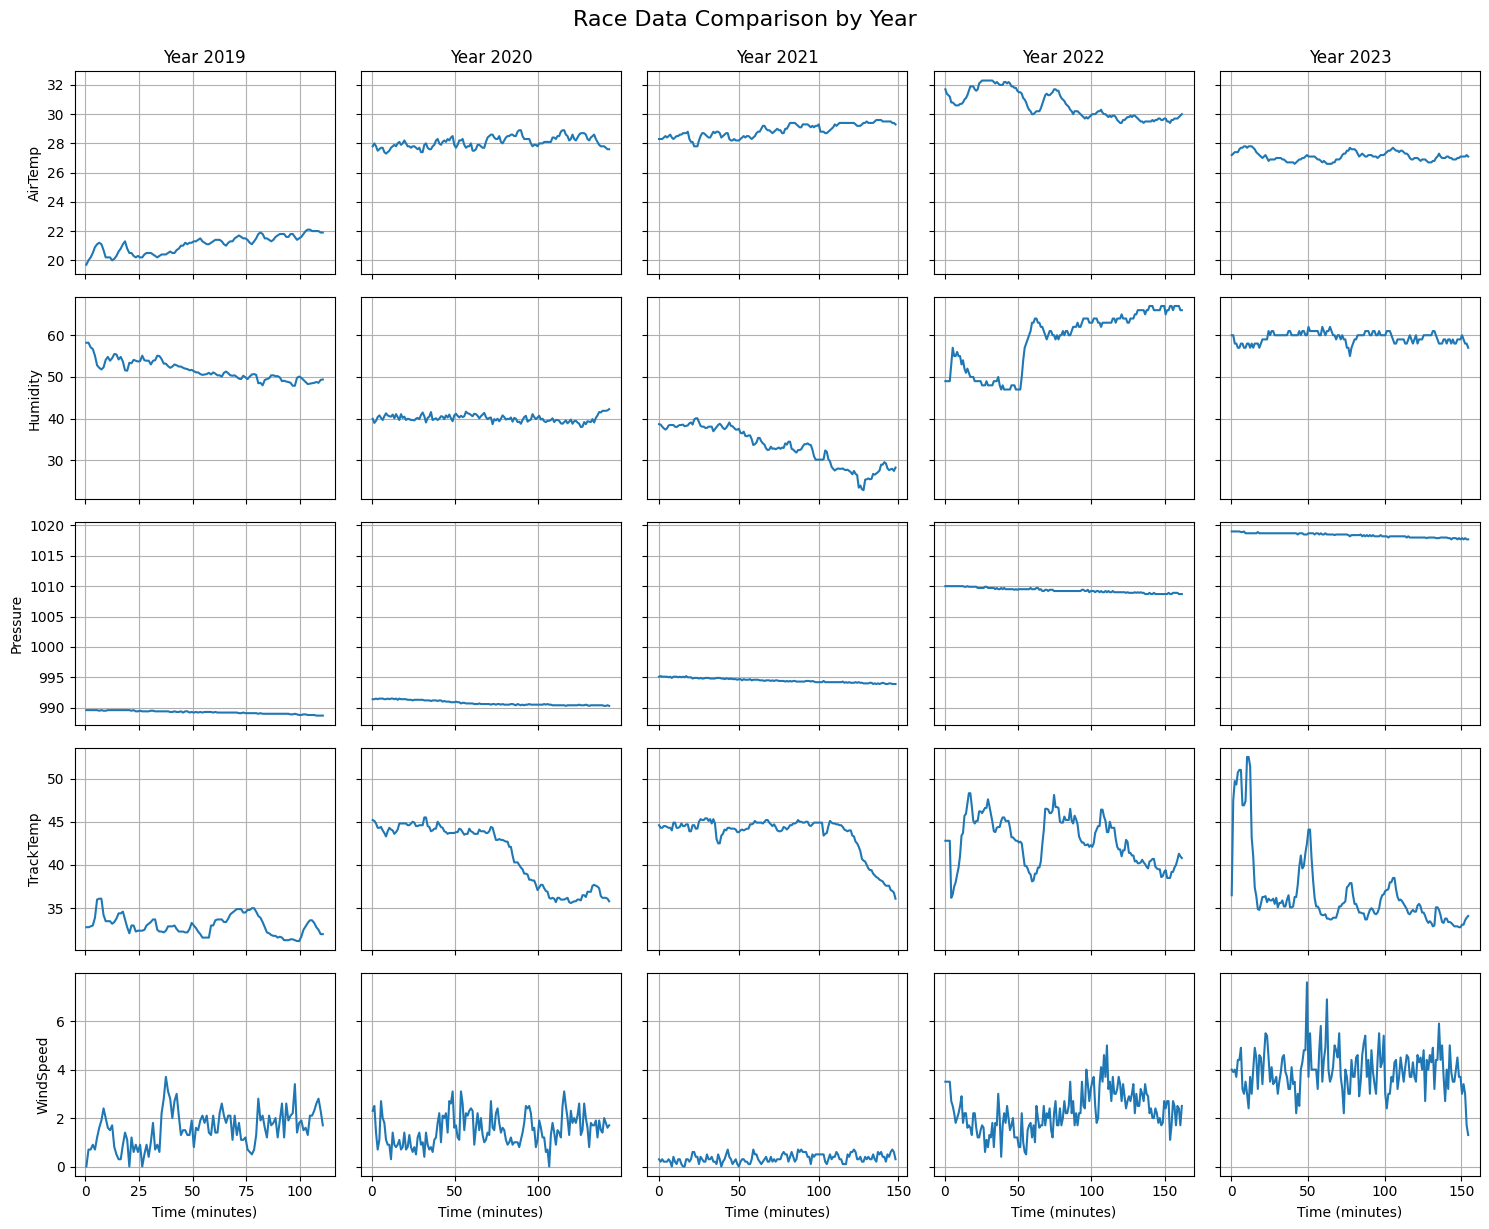

In [68]:
miami_weather['Time'] = pd.to_timedelta(miami_weather['Time'])

# Define the parameters to plot
parameters = ['AirTemp', 'Humidity', 'Pressure', 'TrackTemp', 'WindSpeed']

# Get the unique years
years = miami_weather['year'].unique()

# Create subplots for side-by-side comparison
fig, axs = plt.subplots(len(parameters), len(years), figsize=(15, 12), sharex='col', sharey='row')

# Loop through each year and parameter to create subplots
for col, year in enumerate(years):
    miami_weather_year = miami_weather[miami_weather['year'] == year]  # Filter data for the year
    for row, param in enumerate(parameters):
        axs[row, col].plot(miami_weather_year['Time'].dt.total_seconds() / 60, miami_weather_year[param], label=f'{param} ({year})')
        if col == 0:  # Label y-axis only for the first column
            axs[row, col].set_ylabel(param)
        if row == len(parameters) - 1:  # Label x-axis only for the last row
            axs[row, col].set_xlabel('Time (minutes)')
        axs[row, col].set_title(f'Year {year}' if row == 0 else "")
        axs[row, col].grid(True)

# Adjust layout and add a super title
plt.tight_layout()
fig.suptitle('Race Data Comparison by Year', fontsize=16, y=1.02)
plt.show()

# Lando Qualifying Analysis

In [124]:
lando_2024_quali[lando_2024_quali["Race"]=="Bahrain Grand Prix"]

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,Race
657,0 days 01:04:57.439000,NOR,4,0 days 00:01:55.413000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:44.319000,...,McLaren,0 days 01:03:01.758000,2023-04-30 11:04:03.228,12,8.0,False,,False,False,Bahrain Grand Prix
658,0 days 01:06:46.178000,NOR,4,0 days 00:01:48.739000,2.0,1.0,NaT,NaT,0 days 00:00:39.036000,0 days 00:00:44.081000,...,McLaren,0 days 01:04:57.439000,2023-04-30 11:05:58.909,1,8.0,False,,False,True,Bahrain Grand Prix
659,0 days 01:08:34.272000,NOR,4,0 days 00:01:48.094000,3.0,1.0,NaT,NaT,0 days 00:00:38.463000,0 days 00:00:43.906000,...,McLaren,0 days 01:06:46.178000,2023-04-30 11:07:47.648,1,8.0,False,,False,True,Bahrain Grand Prix
660,0 days 01:10:22.368000,NOR,4,0 days 00:01:48.096000,4.0,1.0,NaT,NaT,0 days 00:00:38.536000,0 days 00:00:43.961000,...,McLaren,0 days 01:08:34.272000,2023-04-30 11:09:35.742,1,8.0,False,,False,True,Bahrain Grand Prix
661,0 days 01:12:10.448000,NOR,4,0 days 00:01:48.080000,5.0,1.0,NaT,NaT,0 days 00:00:38.421000,0 days 00:00:43.998000,...,McLaren,0 days 01:10:22.368000,2023-04-30 11:11:23.838,1,8.0,False,,False,True,Bahrain Grand Prix
662,0 days 01:13:58.664000,NOR,4,0 days 00:01:48.216000,6.0,1.0,NaT,NaT,0 days 00:00:38.509000,0 days 00:00:43.997000,...,McLaren,0 days 01:12:10.448000,2023-04-30 11:13:11.918,1,8.0,False,,False,True,Bahrain Grand Prix
663,0 days 01:15:46.912000,NOR,4,0 days 00:01:48.248000,7.0,1.0,NaT,NaT,0 days 00:00:38.482000,0 days 00:00:44.060000,...,McLaren,0 days 01:13:58.664000,2023-04-30 11:15:00.134,1,8.0,False,,False,True,Bahrain Grand Prix
664,0 days 01:17:35.248000,NOR,4,0 days 00:01:48.336000,8.0,1.0,NaT,NaT,0 days 00:00:38.588000,0 days 00:00:43.942000,...,McLaren,0 days 01:15:46.912000,2023-04-30 11:16:48.382,1,8.0,False,,False,True,Bahrain Grand Prix
665,0 days 01:19:27.591000,NOR,4,0 days 00:01:52.343000,9.0,1.0,NaT,0 days 01:19:26.272000,0 days 00:00:38.789000,0 days 00:00:44.067000,...,McLaren,0 days 01:17:35.248000,2023-04-30 11:18:36.718,1,9.0,False,,False,False,Bahrain Grand Prix
666,0 days 01:21:43.311000,NOR,4,0 days 00:02:15.720000,10.0,2.0,0 days 01:19:46.631000,NaT,0 days 00:00:55.550000,0 days 00:00:44.298000,...,McLaren,0 days 01:19:27.591000,2023-04-30 11:20:29.061,124,13.0,False,,False,False,Bahrain Grand Prix


In [118]:
lando_2024_quali.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate', 'Race'],
      dtype='object')